<a href="https://colab.research.google.com/github/aibalit200/almat/blob/main/welcome/running_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv'
df = pd.read_csv(url)

Этот код загружает данные по мировому энергопотреблению из открытого источника Our World in Data

In [9]:
df = df[['country', 'year', 'primary_energy_consumption', 'population']]
df.columns = ['Страна', 'Год', 'Потребление энергии (ТВт·ч)', 'Население']
latest_year = df['Год'].max()
df_latest = df[df['Год'] == latest_year].dropna()
df_latest['Потребление на душу населения (кВт·ч)'] = (df_latest['Потребление энергии (ТВт·ч)'] * 1e9) / df_latest['Население']
df_latest = df_latest.sort_values(by=['Потребление на душу населения (кВт·ч)', 'Потребление энергии (ТВт·ч)'], ascending=[False, False])
df_latest.reset_index(drop=True, inplace=True)
df_latest = df_latest[df_latest['Потребление на душу населения (кВт·ч)'] > 0]
df_latest.head(20)

,Страна,Год,Потребление энергии (ТВт·ч),Население,Потребление на душу населения (кВт·ч)
0,Qatar,2023,616.209,2716399.0,226847.749539
1,Iceland,2023,62.837,375322.0,167421.574008
2,Singapore,2023,964.022,6014725.0,160276.986895
3,United Arab Emirates,2023,1425.916,9516871.0,149830.338144
4,Trinidad and Tobago,2023,163.850,1534938.0,106746.982614
5,Kuwait,2023,438.113,4310107.0,101647.824520
6,Norway,2023,553.084,5474363.0,101031.663410
7,Canada,2023,3874.887,38781288.0,99916.408140
8,Oman,2023,430.095,4644384.0,92605.391802
9,United States,2023,26189.199,339996576.0,77027.831598


Данные нормализуются, очищаются от пропусков, рассчитывается потребление на душу населения, таблица сортируется, а нулевые и пустые значения отфильтровываются. Выводятся первые 20 строк таблицы.


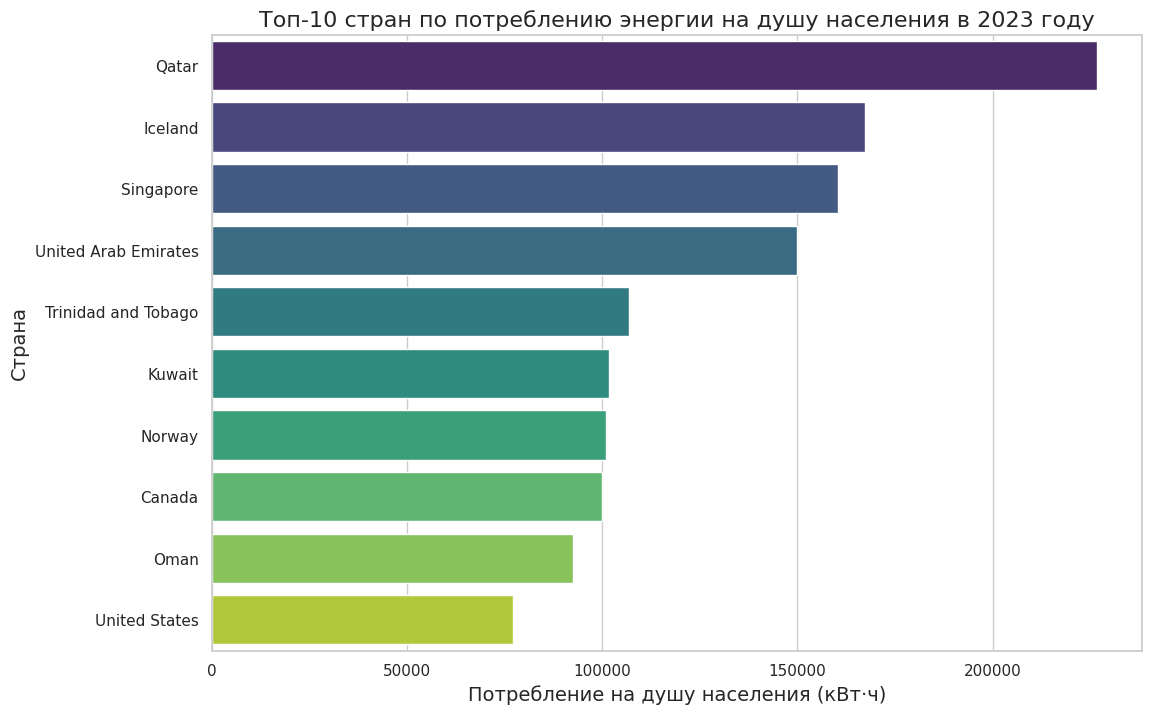

In [12]:
sns.set(style="whitegrid")
top_10_countries = df_latest.head(10)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Потребление на душу населения (кВт·ч)', y='Страна', data=top_10_countries, hue='Страна', palette='viridis', legend=False)
ax.set_title(f'Топ-10 стран по потреблению энергии на душу населения в {latest_year} году', fontsize=16)
ax.set_xlabel('Потребление на душу населения (кВт·ч)', fontsize=14)
ax.set_ylabel('Страна', fontsize=14)
plt.show()

Этот код строит столбчатую диаграмму, показывающую топ-10 стран с самым высоким потреблением энергии на душу населения.


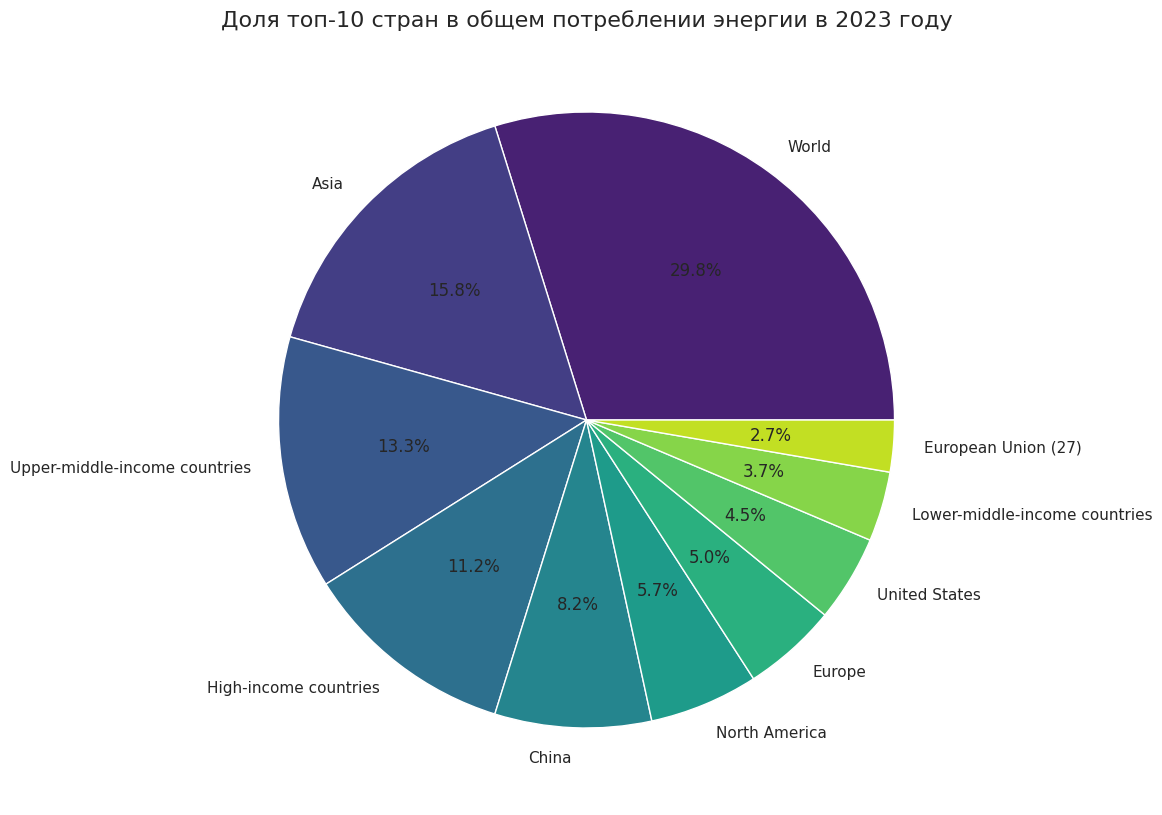

In [13]:
top_10_total_consumption = df_latest.nlargest(10, 'Потребление энергии (ТВт·ч)')
plt.figure(figsize=(10, 10))
plt.pie(top_10_total_consumption['Потребление энергии (ТВт·ч)'], labels=top_10_total_consumption['Страна'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(top_10_total_consumption)))
plt.title(f'Доля топ-10 стран в общем потреблении энергии в {latest_year} году', fontsize=16)
plt.show()

Здесь создаётся круговая диаграмма, отображающая долю топ-10 стран в общем мировом энергопотреблении.
